# Geodesics in Schwarzschild spacetime

This notebook aims at recovering some geodesics of Schwarzschild spacetime using numerical tools implemented in the SageMath class **IntegratedGeodesic**, within the  [SageManifolds](https://sagemanifolds.obspm.fr) project (version 1.3, as included in SageMath 8.3).

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.3/SM_Schwarzschild_geod.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 8.2 is required to run this notebook:

In [1]:
version()

'SageMath version 8.3, Release Date: 2018-08-03'

First set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

## Spacetime manifold

To set the Schwarzschild spacetime, declare a 4-dimensional Lorentzian manifold and a non-negative parameter $m$:

In [3]:
Schw = Manifold(4, 'Schw', latex_name=r'\mathcal{Schw}', 
                structure='Lorentzian')
m = var('m') ; assume(m >= 0)

Define the Boyer-Lindquist coordinates on the union of two subregions $\mathcal{R}_{\mathrm{I}}$ and $\mathcal{R}_{\mathrm{II}}$:

In [4]:
regI = Schw.open_subset('R_I', r'\mathcal{R}_{\mathrm{I}}')
regII = Schw.open_subset('R_II', r'\mathcal{R}_{\mathrm{II}}')
regI_II = regI.union(regII)
BL.<t,r,th,ph> = regI_II.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
BL_I = BL.restrict(regI, r>2*m)
BL_II = BL.restrict(regII, r<2*m)

Finally set the Lorentzian metric of Schwarzschild spacetime:

In [5]:
g = Schw.metric()
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Geodesics in Boyer-Lindquist coordinates

### Defining the geodesic

Declare the various variables needed to define a geodesic; start with the affine parameter and its extremal values:

In [6]:
affine_param = var('s s_0 s_max')

Then, declare the starting point of the geodesic:

In [7]:
initial_pt_coords = var('t_0 r_0 th_0 ph_0') ; assume(r_0 > 2*m)
p_0 = regI.point(initial_pt_coords, name='p_0')

Declare the initial tangent vector:

In [8]:
initial_tgt_vec_comps = var('Dt_0 Dr_0 Dth_0 Dph_0')
v_0 = Schw.tangent_space(p_0)(initial_tgt_vec_comps)

The parametrised geodesic may now be initialised:

In [9]:
geod = Schw.integrated_geodesic(g, affine_param, v_0, verbose=True)

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [Dph_0, Dr_0, Dt_0, Dth_0, m, ph_0, r_0, s_0, s_max, t_0, th_0].


Display the system of the geodesic equations:

In [10]:
sys = geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold Schw equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold Schw, and integrated over the Real interval (s_0, s_max) as a solution to the following geodesic equations, written with respect to Chart (R_I_union_R_II, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold Schw with coordinates [t_0, r_0, th_0, ph_0] with respect to Chart (R_I_union_R_II, (t, r, th, ph))
Initial tangent vector: Tangent vector at Point p_0 on the 4-dimensional Lorentzian manifold Schw with components [Dt_0, Dr_0, Dth_0, Dph_0] with respect to Chart (R_I_union_R_II, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds 

### Computing numerical solutions

#### Timelike geodesics

##### Bounded orbit

Set a dictionnary providing numerical values for each of the parameters apprearing in the system defining the geodesic. 

The values suggested below make the initial tangent vector timelike with squared norm equal to -1. This way, the curve parameter `s` not only is an affine parameter of the (timelike) geodesic, but it actually is the proper time along it (up to numerical roundings).

In [11]:
params_values_bounded = {m:1, s_0:0, s_max:1500, t_0:0, r_0:8, th_0:pi/2, ph_0:1e-12, 
                         Dt_0:sqrt(80.81)/(4*sqrt(3)), Dr_0:0, Dth_0:0, Dph_0:4.1/64}

Then integrate the geodesic for such values of the parameters:

In [12]:
Schw.default_chart().valid_coordinates(*p_0.coord())

True

In [13]:
sol_bounded = geod.solve(step=4, parameters_values=params_values_bounded, 
                           solution_key='timelike_bounded_equatorial', verbose=True)

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'timelike_bounded_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).


The squared norm $g_{\mu\nu} \dot{x}^{\mu} \dot{x}^{\nu}$ of the vector tangent to any geodesic with respect to any affine parameter $s$ is constant throughout motion.

In addition, up to a rotation of the system of polar coordinates, any geodesic in Schwarzschild spacetime is known to have constant coordinate $\theta$ equal to $\pi/2$ (which is why it was suggested above to set the initial condition on $\theta$ to $\pi/2$).
In such a situation, energy $e$ and angular momentum $l$ per unit mass, defined as follows, are also conserved along a geodesic of Schwarzschild spacetime:

$$e = \left( 1 - \frac{2m}{r}  \right) \dot{t}$$
    
$$l = r^{2} \dot{\phi}$$

Therefore, using an interpolation of the previous numerical solution, one may check that these three quantities are indeed conserved along the numerical solution previoulsy computed (not to be disturbed by initial edge effects, the reference value used to check conservations of the various quantities is updated after 10 steps):

Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'timelike_bounded_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


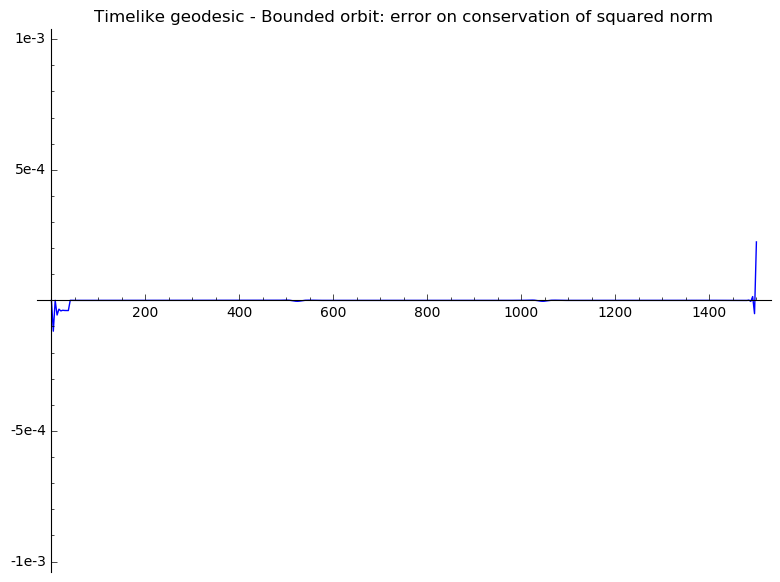

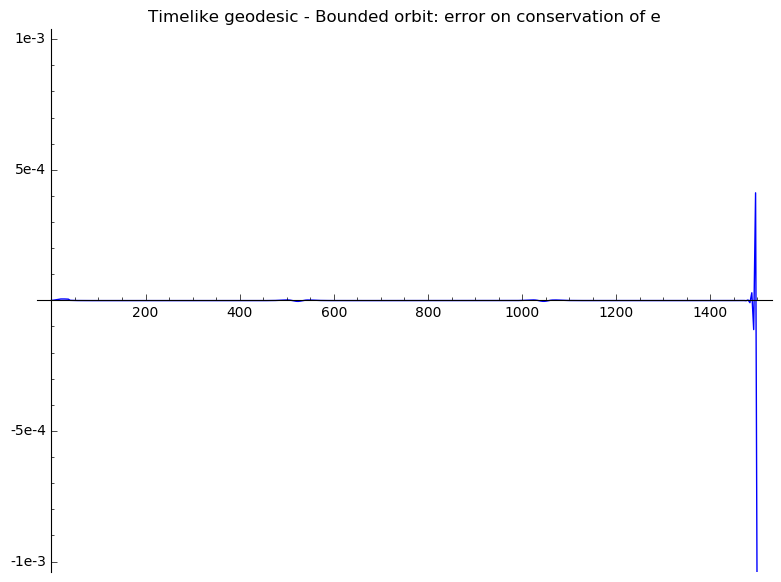

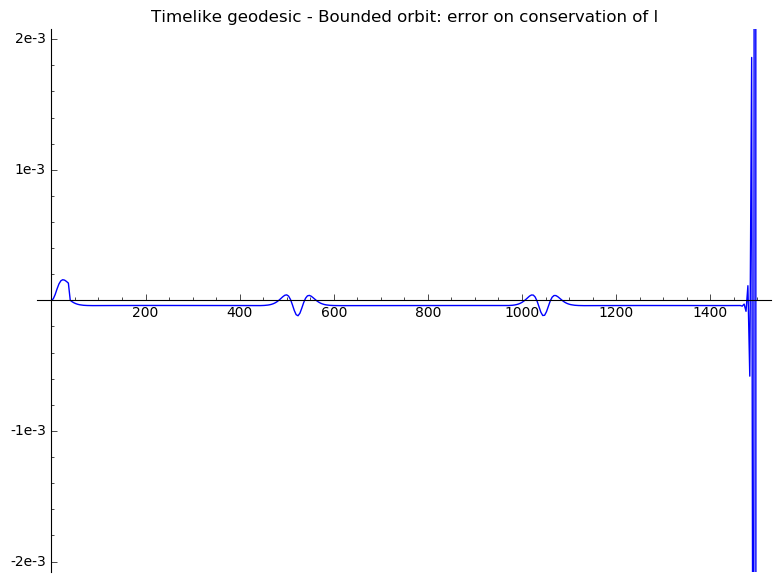

In [14]:
interp_bounded = geod.interpolate(solution_key='timelike_bounded_equatorial', 
                                  interpolation_key='timelike_bounded_equatorial', 
                                  verbose=True)

error_squar_norm_bounded = []
error_e_bounded = []
error_l_bounded = []

i = 0
for (S,T,R,TH,PH) in sol_bounded:
    P = geod(S, interpolation_key='timelike_bounded_equatorial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='timelike_bounded_equatorial')

    squar_norm_bounded = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_bounded = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({m:1}))
    l_bounded = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
                                          
    if i == 0:
        squar_norm_bounded_0 = squar_norm_bounded
        e_bounded_0 = e_bounded
        l_bounded_0 = l_bounded
 
    if i == 10:
        squar_norm_bounded_0 = squar_norm_bounded
        e_bounded_0 = e_bounded
        l_bounded_0 = l_bounded

    error_squar_norm_bounded += [(S,squar_norm_bounded - squar_norm_bounded_0)]
    error_e_bounded += [(S,e_bounded - e_bounded_0)]
    error_l_bounded += [(S,l_bounded - l_bounded_0)]
    
    i += 1

plot_error_squar_norm_bounded = line(error_squar_norm_bounded)
plot_error_e_bounded = line(error_e_bounded)
plot_error_l_bounded = line(error_l_bounded)

plot_error_squar_norm_bounded.show(title="Timelike geodesic - Bounded orbit: error on conservation of squared norm",
                                   ymin=-1e-3, ymax=1e-3)
plot_error_e_bounded.show(title="Timelike geodesic - Bounded orbit: error on conservation of e", 
                          ymin=-1e-3, ymax=1e-3)
plot_error_l_bounded.show(title="Timelike geodesic - Bounded orbit: error on conservation of l",
                          ymin=-2e-3, ymax=2e-3)

The curves are indeed constant with negligible numerical variations, the jolts in the middle being correlated with radial coordinate $r$ reaching a minimum.
The jolts get smaller if one uses a shorter step of integration when calling method `solve`.

One may finally plot the spatial part of the geodesic.
To do so, start with defining the 3-dimensional Euclidean space with Cartesian coordinates:

In [15]:
R3 = Manifold(3, 'R3', start_index=1)
cart.<x,y,z> = R3.chart()
origin = R3.point((0,0,0), name='O')
plot3D_origin = origin.plot(size=10)

Then define the mapping converting the spatial part of Boyer-Lindquist coordinates (i.e. the polar coordinates) into the Cartesian coordinates:

In [16]:
BL_spatial_coords = Schw.diff_map(R3,{(BL, cart): [r*sin(th)*cos(ph), r*sin(th)*sin(ph),
                                                   r*cos(th)]})

This allows to plot the spatial part of the geodesic:

In [17]:
plot3D_projected_geod_bounded = geod.plot_integrated(interpolation_key='timelike_bounded_equatorial',
                                                     mapping=BL_spatial_coords, 
                                                     plot_points=500, thickness=2,
                                                     display_tangent=True, 
                                                     plot_points_tangent=30, scale=8, 
                                                     width_tangent=1, label_axes=False)

Plot the event horizon:

In [18]:
plot3D_event_horizon = BL.plot(chart=cart, mapping=BL_spatial_coords, 
                               fixed_coords={t:0, r:2}, ranges={ph:(0,2*pi)}, 
                               number_values=15, color='yellow', label_axes=False)

Display all graphics:

In [19]:
(plot3D_projected_geod_bounded + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                            online=True)

Graphics3d Object

As expected, one notices the advance of the periastron of such a bounded orbit.

##### Circular case

Schwarzschild spacetime admits circular orbits.
The unique timelike geodesic (still parametrised with proper time) inducing a stable circular orbit with same angular momentum as that of the geodesic considered above is obtained with the following initial conditions:

In [20]:
params_values_circular = {m:1, s_0:0, s_max:500, t_0:0, r_0:(16.81 + 4.1*sqrt(4.81))/2, 
                          th_0:pi/2, ph_0:0, Dt_0:1.1415, Dr_0:0, Dth_0:0, 
                          Dph_0:16.4/(16.81+4.1*sqrt(4.81))^2}

Solve, interpolate and plot the orbit corresponding to such values of the parameters:

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'timelike_circular_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'timelike_circular_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


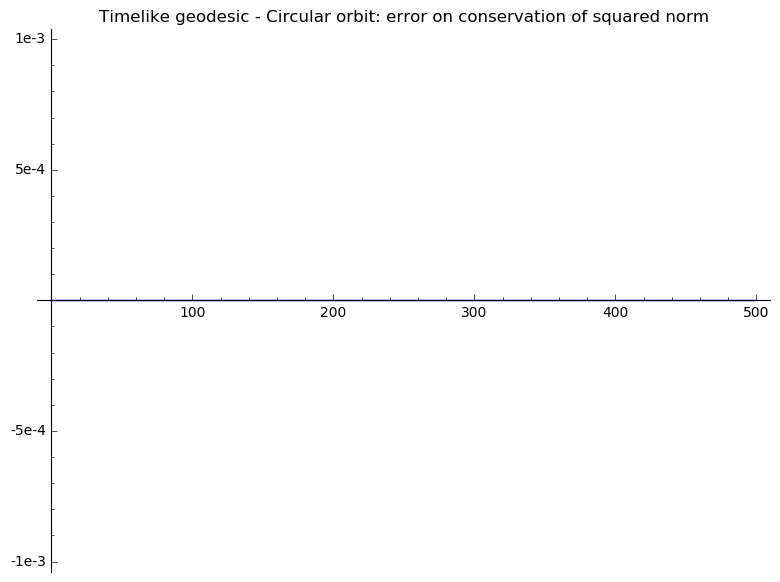

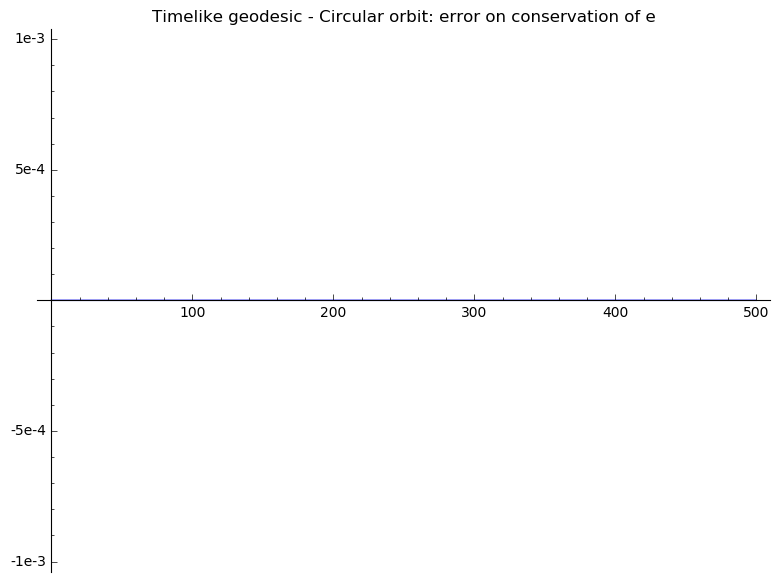

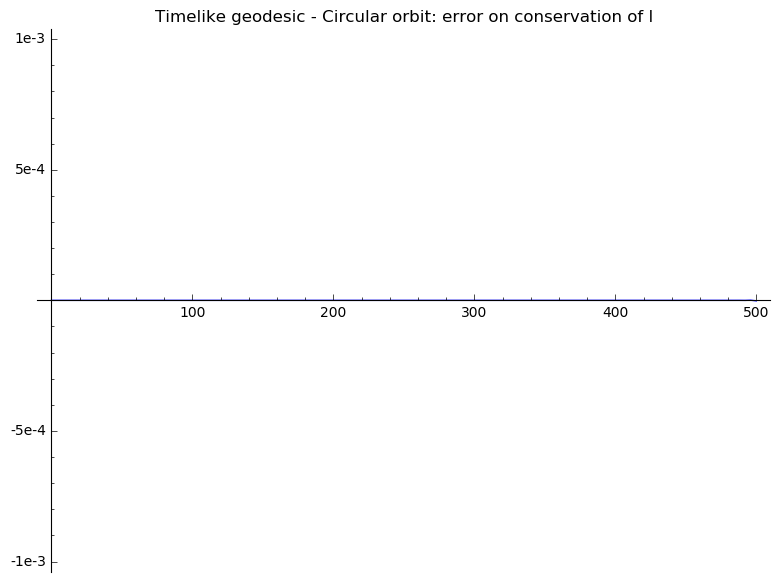

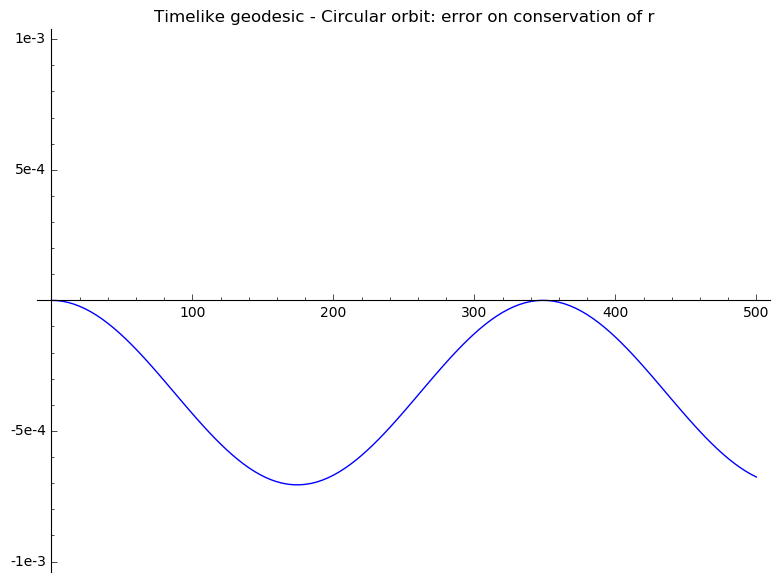

Graphics3d Object

In [21]:
sol_circular = geod.solve(step=4, parameters_values=params_values_circular, 
                          solution_key='timelike_circular_equatorial', verbose=True)
interp_circular = geod.interpolate(solution_key='timelike_circular_equatorial', 
                                   interpolation_key='timelike_circular_equatorial', 
                                   verbose=True)

error_squar_norm_circular = []
error_e_circular = []
error_l_circular = []
error_r_circular = []

i = 0
for (S,T,R,TH,PH) in sol_circular:
    P = geod(S, interpolation_key='timelike_circular_equatorial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='timelike_circular_equatorial')

    squar_norm_circular = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_circular = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({m:1}))
    l_circular = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
                                          
    if i == 0:
        squar_norm_circular_0 = squar_norm_circular
        e_circular_0 = e_circular
        l_circular_0 = l_circular
        R_0 = R

    error_squar_norm_circular += [(S,squar_norm_circular - squar_norm_circular_0)]
    error_e_circular += [(S,e_circular - e_circular_0)]
    error_l_circular += [(S,l_circular - l_circular_0)]
    error_r_circular += [(S,R - R_0)]
    
    i += 1
    
plot_error_squar_norm_circular = line(error_squar_norm_circular)
plot_error_e_circular = line(error_e_circular)
plot_error_l_circular = line(error_l_circular)
plot_error_r_circular = line(error_r_circular)

plot_error_squar_norm_circular.show(title=
                                    "Timelike geodesic - Circular orbit: error on conservation of squared norm",
                                    ymin=-1e-3, ymax=1e-3)
plot_error_e_circular.show(title="Timelike geodesic - Circular orbit: error on conservation of e",
                           ymin=-1e-3, ymax=1e-3)
plot_error_l_circular.show(title="Timelike geodesic - Circular orbit: error on conservation of l",
                           ymin=-1e-3, ymax=1e-3)
plot_error_r_circular.show(title="Timelike geodesic - Circular orbit: error on conservation of r",
                           ymin=-1e-3, ymax=1e-3)

plot3D_projected_geod_circular = geod.plot_integrated(interpolation_key='timelike_circular_equatorial',
                                                      mapping=BL_spatial_coords, 
                                                      plot_points=250, thickness=2,
                                                      display_tangent=True, 
                                                      plot_points_tangent=10, scale=8,
                                                      width_tangent=1, label_axes=False)

(plot3D_projected_geod_circular + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                             online=True)

The second graph, which displays the evolution of radial coordinate $r$, does confirm that the orbit is circular, up to negligible oscillations.

##### Unbounded trajectory

In Schwarzschild spacetime, geodesics with sufficiently high radial velocity or angular momentum may induce unbounded trajectories.
An example of such a geodesic (still parametrised with proper time) which has same angular momentum as that of the geodesics considered above is provided below:

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'timelike_unbounded_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'timelike_unbounded_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


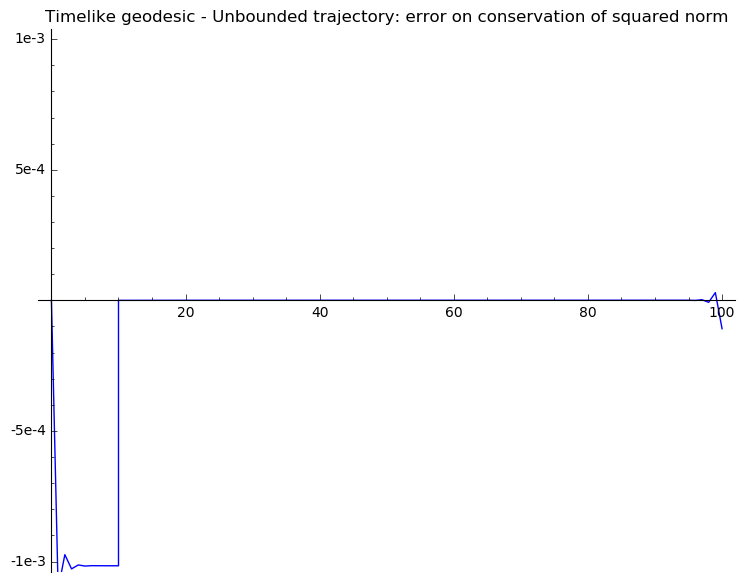

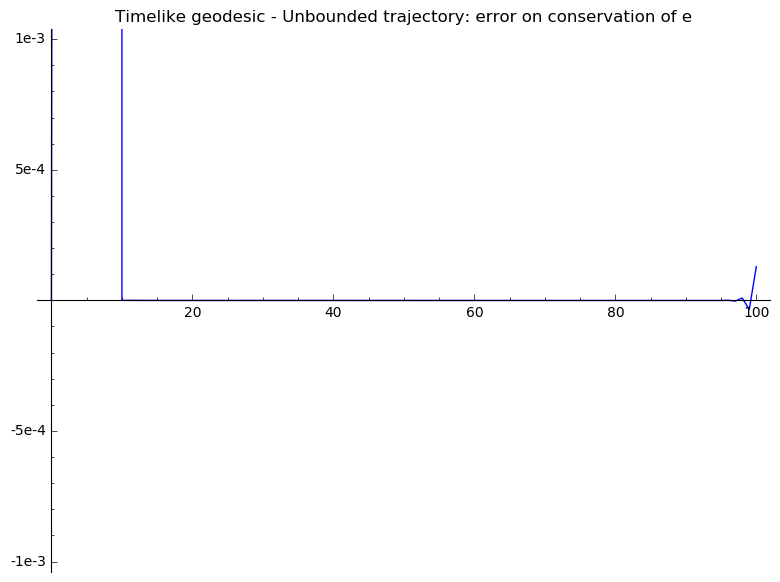

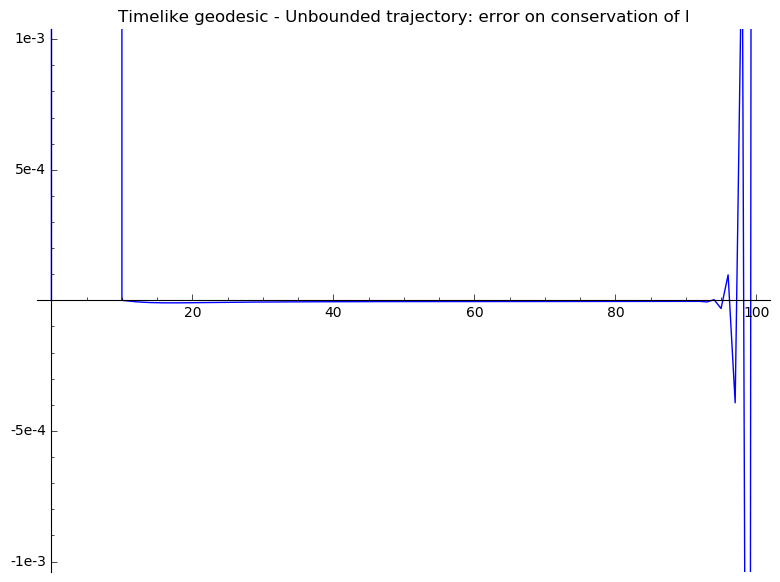

Graphics3d Object

In [22]:
params_values_unbounded = {m:1, s_0:0, s_max:100, t_0:0, r_0:4, th_0:pi/2, ph_0:0, 
                           Dt_0:sqrt(16.405)/2, Dr_0:0.210, Dth_0:0, Dph_0:4.1/16}

sol_unbounded = geod.solve(step=1, parameters_values=params_values_unbounded, 
                           solution_key='timelike_unbounded_equatorial', verbose=True)
interp_unbounded = geod.interpolate(solution_key='timelike_unbounded_equatorial', 
                                   interpolation_key='timelike_unbounded_equatorial', 
                                   verbose=True)

error_squar_norm_unbounded = []
error_e_unbounded = []
error_l_unbounded = []

i = 0
for (S,T,R,TH,PH) in sol_unbounded:
    P = geod(S, interpolation_key='timelike_unbounded_equatorial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='timelike_unbounded_equatorial')

    squar_norm_unbounded = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_unbounded = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({m:1}))
    l_unbounded = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
                                          
    if i == 0:
        squar_norm_unbounded_0 = squar_norm_unbounded
        e_unbounded_0 = e_unbounded
        l_unbounded_0 = l_unbounded

    error_squar_norm_unbounded += [(S,squar_norm_unbounded - squar_norm_unbounded_0)]
    error_e_unbounded += [(S,e_unbounded - e_unbounded_0)]
    error_l_unbounded += [(S,l_unbounded - l_unbounded_0)]
    
    if i == 10:
        squar_norm_unbounded_0 = squar_norm_unbounded
        e_unbounded_0 = e_unbounded
        l_unbounded_0 = l_unbounded

    error_squar_norm_unbounded += [(S,squar_norm_unbounded - squar_norm_unbounded_0)]
    error_e_unbounded += [(S,e_unbounded - e_unbounded_0)]
    error_l_unbounded += [(S,l_unbounded - l_unbounded_0)]    
    
    i += 1

plot_error_squar_norm_unbounded = line(error_squar_norm_unbounded)
plot_error_e_unbounded = line(error_e_unbounded)
plot_error_l_unbounded = line(error_l_unbounded)

plot_error_squar_norm_unbounded.show(title= 
                                     "Timelike geodesic - Unbounded trajectory: error on " +
                                     "conservation of squared norm", 
                                     ymin=-1e-3, ymax=1e-3) 
plot_error_e_unbounded.show(title="Timelike geodesic - Unbounded trajectory: error on conservation of e",
                            ymin=-1e-3, ymax=1e-3)
plot_error_l_unbounded.show(title="Timelike geodesic - Unbounded trajectory: error on conservation of l",
                            ymin=-1e-3, ymax=1e-3)

plot3D_projected_geod_unbounded = geod.plot_integrated(interpolation_key='timelike_unbounded_equatorial',
                                                       mapping=BL_spatial_coords, 
                                                       plot_points=200, thickness=2,
                                                       display_tangent=True, 
                                                       plot_points_tangent=10, scale=8,
                                                       width_tangent=1, label_axes=False)

(plot3D_projected_geod_unbounded + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                              online=True)

#### Null geodesics

##### Unstable circular orbit

The only null, bounded geodesics of Schwarzschild spacetime that do not cross the event horizon induce unstable circular orbits.
In addition, the (constant) radius of such trajectories necessarily equals $3m$.

Below is provided an example of such a (affinely parametrised) geodesic, for which conservation of squared norm, energy and angular momentum is checked:

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'null_circular_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'null_circular_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


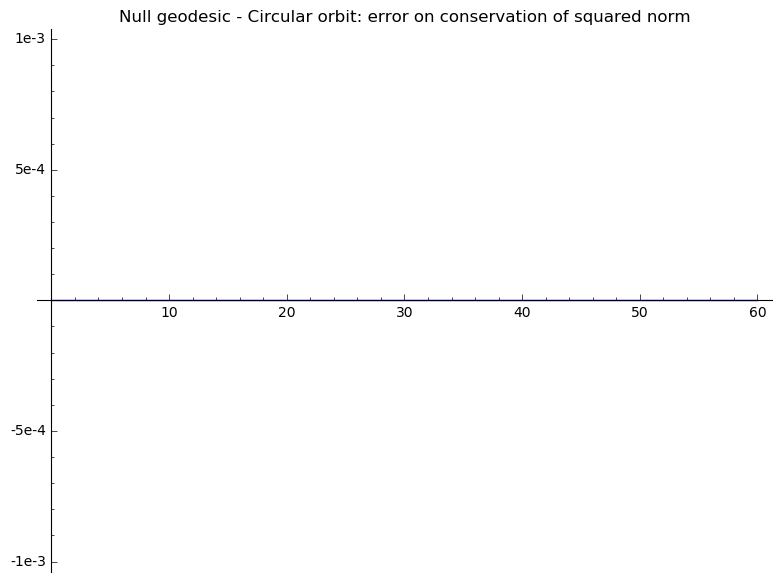

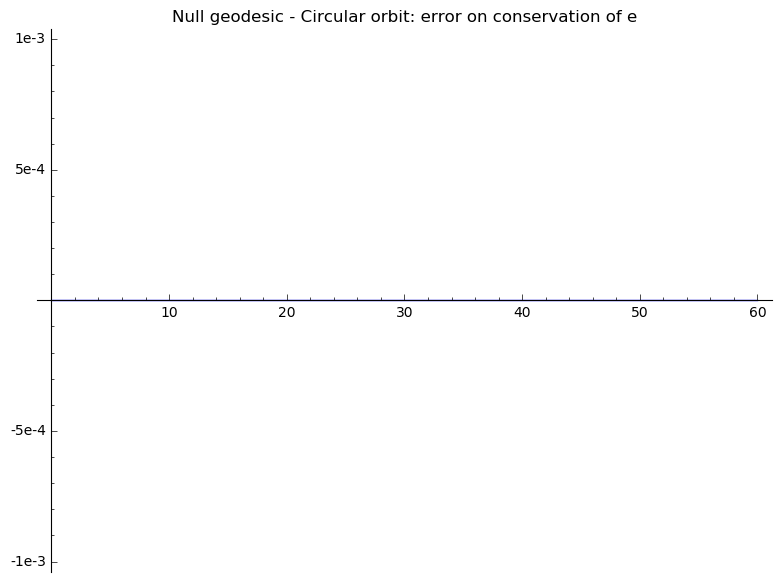

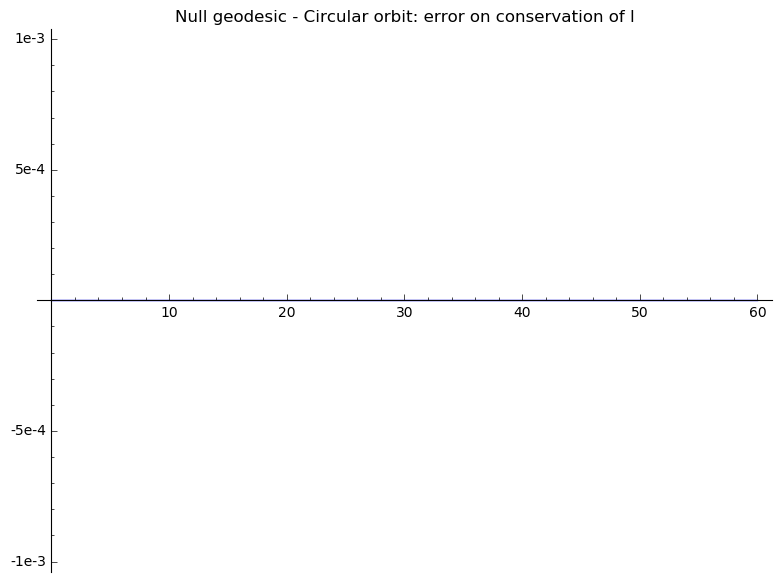

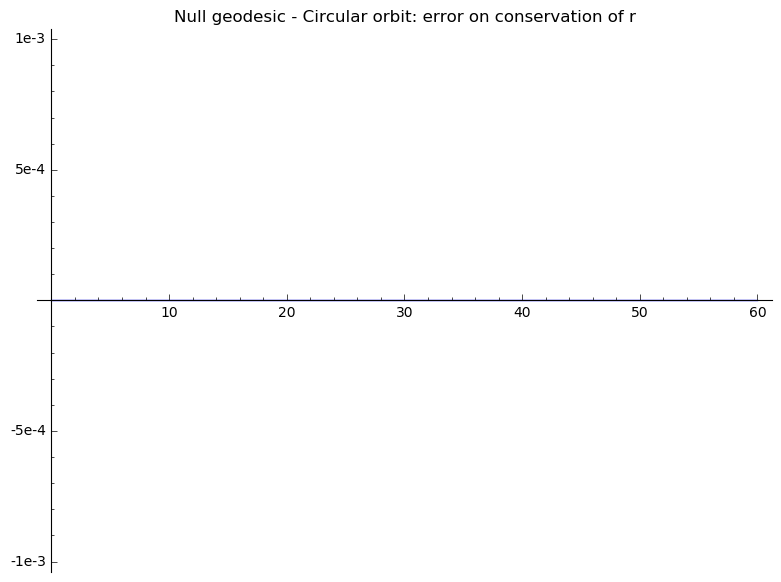

Graphics3d Object

In [23]:
params_values_null_circular = {m:1, s_0:0, s_max:60, t_0:0, r_0:3, th_0:pi/2, ph_0:0, 
                               Dt_0:1/sqrt(3), Dr_0:0, Dth_0:0, Dph_0:1/9}

sol_null_circular = geod.solve(step=1, parameters_values=params_values_null_circular, 
                               solution_key='null_circular_equatorial', verbose=True)
interp_null_circular = geod.interpolate(solution_key='null_circular_equatorial', 
                                        interpolation_key='null_circular_equatorial',
                                        verbose=True)

error_squar_norm_null_circular = []
error_e_null_circular = []
error_l_null_circular = []
error_r_null_circular = []

i = 0
for (S,T,R,TH,PH) in sol_null_circular:
    P = geod(S, interpolation_key='null_circular_equatorial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='null_circular_equatorial')
    
    squar_norm_null_circular = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_null_circular = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({m:1}))
    l_null_circular = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
    
    if i == 0:
        squar_norm_null_circular_0 = squar_norm_null_circular
        e_null_circular_0 = e_null_circular
        l_null_circular_0 = l_null_circular
        R_0 = R

    error_squar_norm_null_circular += [(S, squar_norm_null_circular 
                                          - squar_norm_null_circular_0)]
    error_e_null_circular += [(S, e_null_circular - e_null_circular_0)]
    error_l_null_circular += [(S, l_null_circular - l_null_circular_0)]
    error_r_null_circular += [(S, R - R_0)]
                                       
    i += 1    

plot_error_squar_norm_null_circular = line(error_squar_norm_null_circular)
plot_error_e_null_circular = line(error_e_null_circular)
plot_error_l_null_circular = line(error_l_null_circular)
plot_error_r_null_circular = line(error_r_null_circular)

plot_error_squar_norm_null_circular.show(title=
                                         "Null geodesic - Circular orbit: error on conservation of squared norm",
                                         ymin=-1e-3, ymax=1e-3)
plot_error_e_null_circular.show(title="Null geodesic - Circular orbit: error on conservation of e", 
                                ymin=-1e-3, ymax=1e-3)
plot_error_l_null_circular.show(title="Null geodesic - Circular orbit: error on conservation of l",
                                ymin=-1e-3, ymax=1e-3)
plot_error_r_null_circular.show(title="Null geodesic - Circular orbit: error on conservation of r",
                                ymin=-1e-3, ymax=1e-3)

plot3D_projected_geod_null_circular = geod.plot_integrated(interpolation_key='null_circular_equatorial',
                                                           mapping=BL_spatial_coords, 
                                                           plot_points=200, thickness=2,
                                                           display_tangent=True, 
                                                           plot_points_tangent=10, scale=8,
                                                           width_tangent=1, label_axes=False)

(plot3D_projected_geod_null_circular + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                                  online=True)

As expected, $g_{\mu\nu} \dot{x}^{\mu} \dot{x}^{\nu}$, $e$ and $l$ are conserved up to negligible numerical variations, the first one being equal to zero as it should.
The fourth graph, which displays the evolution of radial coordinate $r$, confirms that the orbit is circular.

##### Unbounded trajectory

Since the type of geodesic considered above is unstable, it is fortunate that numerical roundings do not spoil the numerical integration and allow to visualize the perfectly circular orbit above.
Yet, a tiny variation in the characteristics of the geodesic should significantly change the nature of the trajectory.
For instance, taking an initial radial coordinate $r$ slightly greater than $3m$ induces a diverging trajectory:

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'null_unbounded_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'null_unbounded_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


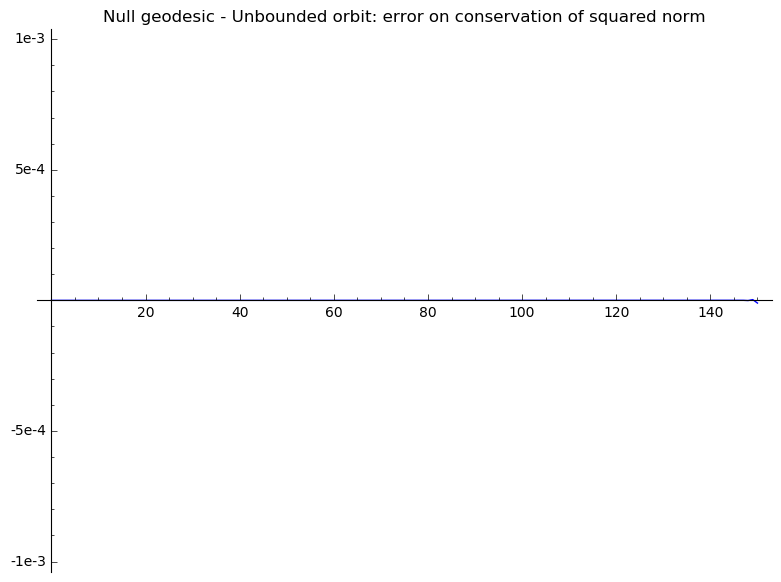

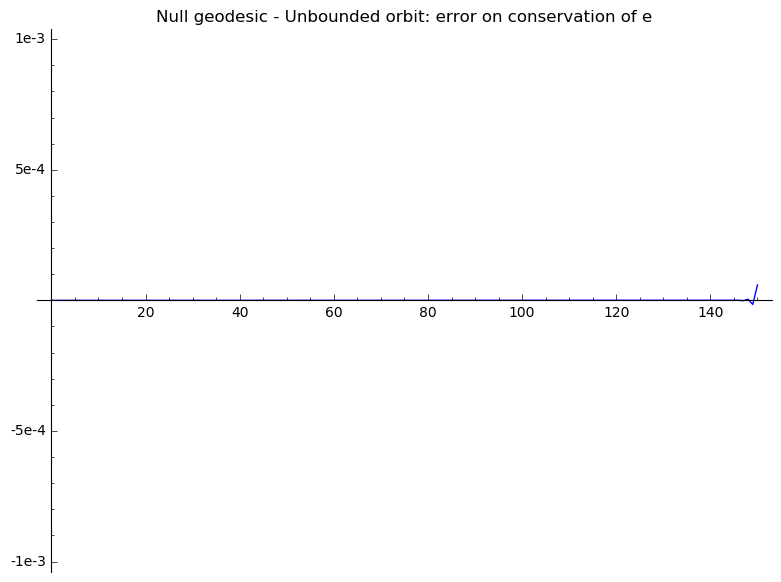

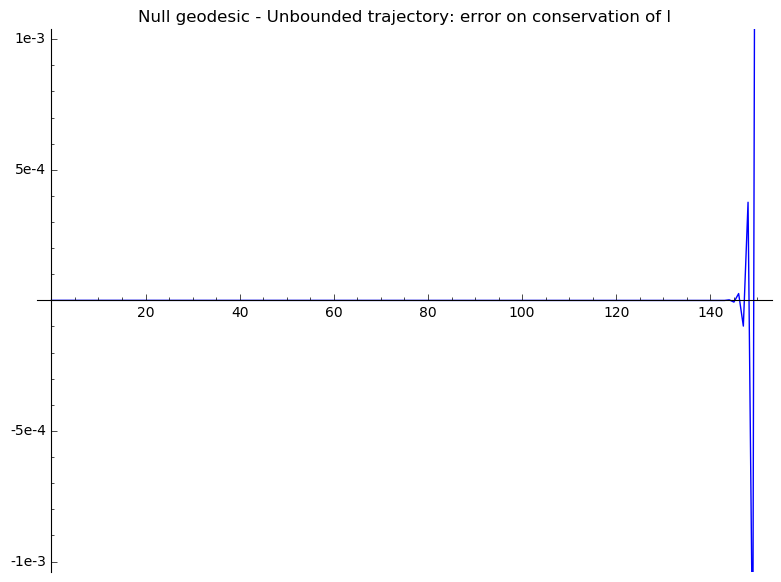

Graphics3d Object

In [24]:
params_values_null_unbounded = {m:1, s_0:0, s_max:150, t_0:0, r_0:3.01, th_0:pi/2, ph_0:0, 
                                Dt_0:1/sqrt(3.01*1.01), Dr_0:0, Dth_0:0, Dph_0:1/3.01^2}

sol_null_unbounded = geod.solve(step=1, parameters_values=params_values_null_unbounded, 
                                solution_key='null_unbounded_equatorial', verbose=True)
interp_null_unbounded = geod.interpolate(solution_key='null_unbounded_equatorial', 
                                         interpolation_key='null_unbounded_equatorial',
                                         verbose=True)

error_squar_norm_null_unbounded = []
error_e_null_unbounded = []
error_l_null_unbounded = []
 
i = 0
for (S,T,R,TH,PH) in sol_null_unbounded:
    P = geod(S, interpolation_key='null_unbounded_equatorial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='null_unbounded_equatorial')

    squar_norm_null_unbounded = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_null_unbounded = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({m:1}))
    l_null_unbounded = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
    
    if i == 0:
        squar_norm_null_unbounded_0 = squar_norm_null_unbounded
        e_null_unbounded_0 = e_null_unbounded
        l_null_unbounded_0 = l_null_unbounded

    error_squar_norm_null_unbounded += [(S, squar_norm_null_unbounded 
                                            - squar_norm_null_unbounded_0)]
    error_e_null_unbounded += [(S, e_null_unbounded - e_null_unbounded_0)]
    error_l_null_unbounded += [(S, l_null_unbounded - l_null_unbounded_0)]
                                       
    i += 1

plot_error_squar_norm_null_unbounded = line(error_squar_norm_null_unbounded)
plot_error_e_null_unbounded = line(error_e_null_unbounded)
plot_error_l_null_unbounded = line(error_l_null_unbounded)

plot_error_squar_norm_null_unbounded.show(title="Null geodesic - Unbounded orbit: error on conservation of " +
                                          "squared norm", ymin=-1e-3, ymax=1e-3)
plot_error_e_null_unbounded.show(title="Null geodesic - Unbounded orbit: error on conservation of e",
                                 ymin=-1e-3, ymax=1e-3)
plot_error_l_null_unbounded.show(title="Null geodesic - Unbounded trajectory: error on conservation of l",
                                 ymin=-1e-3, ymax=1e-3)

plot3D_projected_geod_null_unbounded = geod.plot_integrated(interpolation_key='null_unbounded_equatorial',
                                                            mapping=BL_spatial_coords,
                                                            plot_points=200, thickness=2,
                                                            display_tangent=True,
                                                            plot_points_tangent=10, scale=8,
                                                            width_tangent=1, label_axes=False)

(plot3D_projected_geod_null_unbounded + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                                   online=True)

An initial radial coordinate a bit smaller than $3m$ would have induced a trajectory plunging into the event horizon.
In order to picture such cases of geodesics crossing the event horizon, switch to ingoing Eddington-Finkelstein coordinates, with respect to which the metric is well-defined even on the event horizon.

## Geodesics in Eddington-Finkelstein coordinates

Start with defining the ingoing Eddington-Finkelstein coordinates, set them as the default chart on Schwarzschild spacetime, and provide the transition function from Boyer-Lindquist coordinates to Eddington-Finkelstein coordinates (also ask for the inverse transformation, in order for it to be available to compute the expression of the metric with respect to Edington-Finkelstein frame later):

In [25]:
IEF.<v,r,th,ph> = regI_II.chart(r'v r:(0,+oo) th:(0,pi):\theta ph:\phi')
Schw.set_default_chart(IEF)
Schw.set_default_frame(IEF.frame())
regI_II.set_default_chart(IEF)
regI_II.set_default_frame(IEF.frame())

ch_BL_IEF_I = BL_I.transition_map(IEF, [t+r+2*m*ln(r/(2*m)-1), r, th, ph], 
                                  restrictions2= r>2*m)
ch_BL_IEF_II = BL_II.transition_map(IEF, [t+r+2*m*ln(1-r/(2*m)), r, th, ph], 
                                    restrictions2= r<2*m)

ch_BL_IEF_I.inverse().display()

t = -2*m*log(1/2*r/m - 1) - r + v
r = r
th = th
ph = ph

In [26]:
ch_BL_IEF_II.inverse().display()

t = -2*m*log(-1/2*r/m + 1) - r + v
r = r
th = th
ph = ph

### Metric tensor in the IEF frame

From the transition map `ch_BL_IEF_I` defined above, Sage can compute the components of the metric tensor in the IEF frame in region $\mathcal{R}_{\mathrm{I}}$:

In [27]:
IEF_I = IEF.restrict(regI)
IEF_II = IEF.restrict(regII)

In [28]:
g.display(IEF_I.frame())

g = (2*m - r)/r dv*dv + dv*dr + dr*dv + r^2 dth*dth + r^2*sin(th)^2 dph*dph

We extend these components to all the IEF domain by analytic continuation:

In [29]:
g.add_comp_by_continuation(IEF.frame(), regI, IEF)

Since the IEF frame is now the default frame, we have then

In [30]:
g.display()

g = (2*m - r)/r dv*dv + dv*dr + dr*dv + r^2 dth*dth + r^2*sin(th)^2 dph*dph

The initial conditions are stored in the tangent vector `v_0`, whose components `(Dt_0, Dr_0, Dth_0, Dph_0)` were set in terms of the coordinate frame associated with Boyer-Lindquist coordinates. To get them in terms of the IEF frame, we have to add manually 
the tangent space automorphism linking the BL basis to the the IEF one in the tangent tangent space $\mathcal{T}_{p_{0}}\mathcal{Schw}$ (this is because the point $p_0$ has been declared before the transition map `ch_BL_IEF_I`; otherwise the tangent space automorphism would have been automatically computed from the change of coordinate frames induced by `ch_BL_IEF_I`)

In [31]:
T_0 = v_0.parent()
print(T_0)

Tangent space at Point p_0 on the 4-dimensional Lorentzian manifold Schw


In [32]:
T_0.set_change_of_basis(BL_I.frame().at(p_0), IEF.frame().at(p_0),
                        Schw.change_of_frame(BL_I.frame(), IEF_I.frame()).at(p_0))

The components of `v_0` with respect to the tangent space basis induced by the IEF frame can
then be computed:

In [33]:
v_0[IEF.frame().at(p_0),:]

[Dt_0 - Dr_0*r_0/(2*m - r_0), Dr_0, Dth_0, Dph_0]

One may now declare a new parametrised geodesic set in terms of Eddington-Finkelstein coordinates:

In [34]:
geod_IEF = Schw.integrated_geodesic(g, affine_param, v_0, verbose=True)

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [Dph_0, Dr_0, Dt_0, Dth_0, m, ph_0, r_0, s_0, s_max, t_0, th_0].


From an abstract point of view, it is the same as the geodesic `geod` previously used, but the equations defining it are now expressed in terms of Eddington-Finkelstein coordinates, so that the numerical solutions computed will correspond to Eddington-Finkelstein coordinates as well.
Check this by displaying the system defining it:

In [35]:
sys = geod_IEF.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold Schw equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold Schw, and integrated over the Real interval (s_0, s_max) as a solution to the following geodesic equations, written with respect to Chart (R_I_union_R_II, (v, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold Schw with coordinates [-2*m*log(2) - 2*m*log(m) + 2*m*log(-2*m + r_0) + r_0 + t_0, r_0, th_0, ph_0] with respect to Chart (R_I_union_R_II, (v, r, th, ph))
Initial tangent vector: Tangent vector at Point p_0 on the 4-dimensional Lorentzian manifold Schw with components [Dt_0 - Dr_0*r_0/(2*m - r_0), Dr_0, Dth_0, Dph_0] with respect to Chart (R_I_union_R_II, (v, r, th, ph))

d(v)/ds = Dv
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dv)/ds = (Dph^2*r^3*sin(th)^2 + Dth^2*r^3 - Dv^2*m)/r^2
d(Dr)/ds = -(2*Dth^2*m*r^3 - Dth^2*r^4 - 2*Dv^2*m^2 - (2*Dr*Dv - Dv^2)*m*r + (2*Dph^2*m*r^3 - Dph^2*r^4)*sin(th)^2)/r^3
d(Dth)/ds = (Dph^2*r*c

##### Timelike plunging geodesic

The following example defines a timelike geodesic (parametrised with proper time) with same angular momentum as that of timelike geodesics previously considered, which crosses the event horizon $\mathcal{H}$.
Notice that, in Eddington-Finkelstein coordinates, energy $e$ per unit mass is computed from the following relation:

$$e = \left( 1 - \frac{2m}{r}  \right) \dot{v} - \dot{r}$$

Provide the parameters values, integrate and interpolate:

In [36]:
params_values_plunging = {m:1, s_0:0, s_max:15, t_0:0, r_0:3.8, th_0:pi/2, ph_0:0, 
                          Dt_0:sqrt(31.25/(3.8*1.8)), Dr_0:0, Dth_0:0, Dph_0:4.1/(3.8)^2}

sol_plunging = geod_IEF.solve(step=0.1, parameters_values=params_values_plunging, 
                              solution_key='timelike_plunging_equatorial', verbose=True)
interp_plunging = geod_IEF.interpolate(solution_key='timelike_plunging_equatorial', 
                                       interpolation_key='timelike_plunging_equatorial',
                                       verbose=True)

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'timelike_plunging_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'timelike_plunging_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


Check conservation of norm, energy and angular momentum:

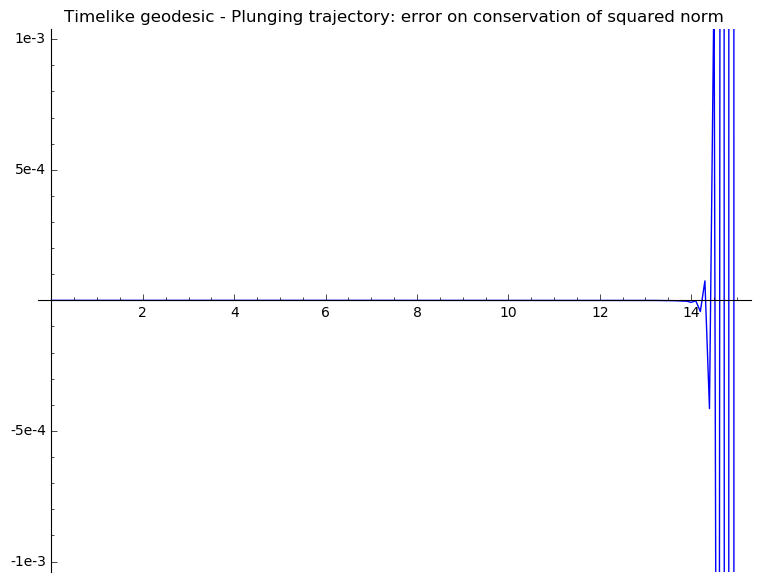

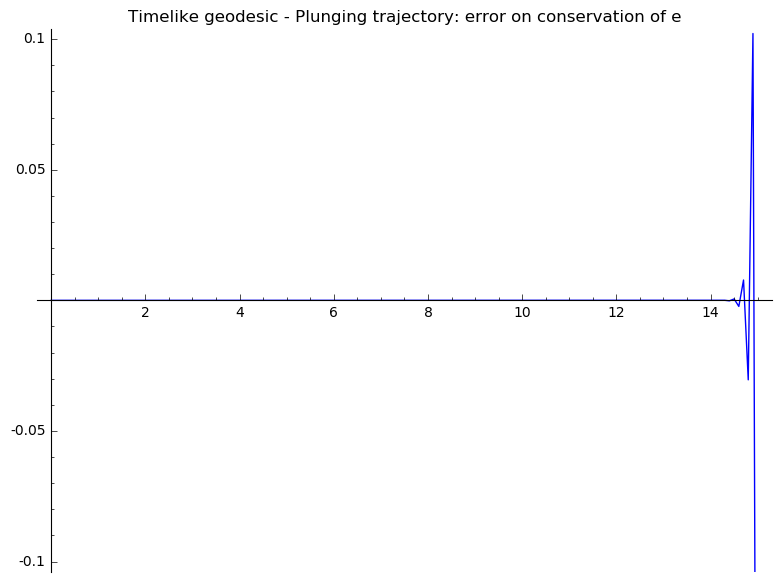

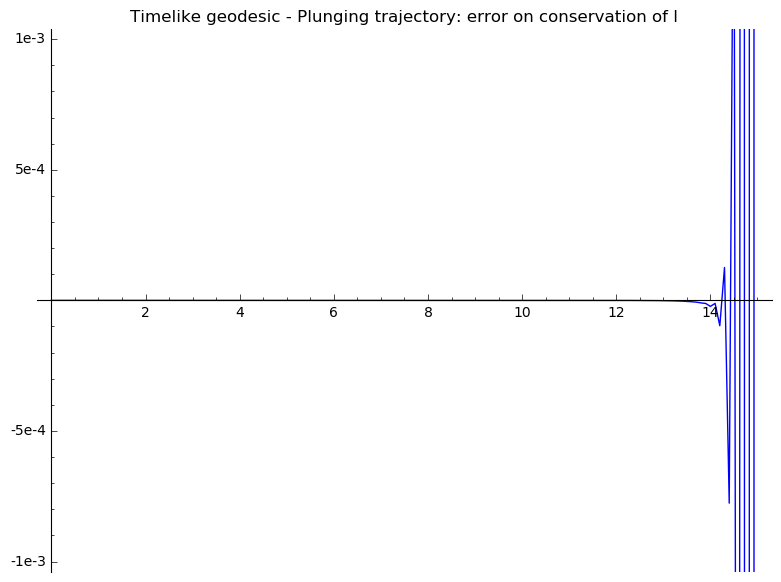

In [37]:
error_squar_norm_plunging = []
error_e_plunging = []
error_l_plunging = []

i = 0
for (S,T,R,TH,PH) in sol_plunging:    
    P = geod_IEF(S, interpolation_key='timelike_plunging_equatorial')
    V = geod_IEF.tangent_vector_eval_at(S, interpolation_key='timelike_plunging_equatorial')    
    # print(i)
    squar_norm_plunging = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_plunging = numerical_approx((-g.at(P)[0,0]*V[0] - V[1]).substitute({m:1}))
    l_plunging = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
    
    if i == 0:
        squar_norm_plunging_0 = squar_norm_plunging
        e_plunging_0 = e_plunging
        l_plunging_0 = l_plunging
    
    if i == 10:
        squar_norm_plunging_0 = squar_norm_plunging
        e_plunging_0 = e_plunging
        l_plunging_0 = l_plunging    
    
    error_squar_norm_plunging += [(S,squar_norm_plunging - squar_norm_plunging_0)]
    error_e_plunging += [(S,e_plunging - e_plunging_0)]
    error_l_plunging += [(S,l_plunging - l_plunging_0)]
    
    i += 1
    
plot_error_squar_norm_plunging = line(error_squar_norm_plunging)
plot_error_e_plunging = line(error_e_plunging)
plot_error_l_plunging = line(error_l_plunging)

plot_error_squar_norm_plunging.show(title="Timelike geodesic - Plunging trajectory: error on conservation of " + 
                                    "squared norm", ymin=-1e-3, ymax=1e-3)
plot_error_e_plunging.show(title="Timelike geodesic - Plunging trajectory: error on conservation of e",
                           ymin=-1e-1, ymax=1e-1)
plot_error_l_plunging.show(title="Timelike geodesic - Plunging trajectory: error on conservation of l",
                           ymin=-1e-3, ymax=1e-3)

In order to plot the spatial part of the geodesic, define the mapping converting the spatial part of Eddingon-Finkelstein coordinates (i.e. the polar coordinates) into the Cartesian coordinates; this mapping obviously has the same form as that previously used on the Boyer-Lindquist coordinates: 

In [38]:
IEF_spatial_coords = Schw.diff_map(R3, {(IEF, cart): [r*sin(th)*cos(ph), r*sin(th)*sin(ph),
                                                      r*cos(th)]})

This finally allows to plot the spatial part of the geodesic:

In [39]:
plot3D_projected_geod_IEF_plunging = geod_IEF.plot_integrated(interpolation_key='timelike_plunging_equatorial',
                                                              mapping=IEF_spatial_coords,
                                                              plot_points=200, thickness=2,
                                                              display_tangent=True,
                                                              plot_points_tangent=10,
                                                              scale=0.5,
                                                              width_tangent=1,
                                                              label_axes=False)

(plot3D_projected_geod_IEF_plunging + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                                 online=True)

Graphics3d Object

##### Null plunging geodesic

The following example defines a (affinely parametrised) null geodesic with same angular momentum as that of nulll geodesics previously considered, which crosses the event horizon $\mathcal{H}$ due to an initial radial coordinate $r$ slightly smaller than $3m$.

In [40]:
params_values_null_plunging = {m:1, s_0:0, s_max:43.9, t_0:0, r_0:2.99, th_0:pi/2, ph_0:0, 
                               Dt_0:1/sqrt(2.99*0.99), Dr_0:0, Dth_0:0, Dph_0:1/(2.99)^2}

sol_null_plunging = geod_IEF.solve(step=0.1, parameters_values=params_values_null_plunging, 
                                   solution_key='null_plunging_equatorial', verbose=True)
interp_null_plunging = geod_IEF.interpolate(solution_key='null_plunging_equatorial', 
                                            interpolation_key='null_plunging_equatorial',
                                            verbose=True)

Performing numerical integration with method 'rk4_maxima'...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'null_plunging_equatorial' (if this key already referred to a former numerical solution, such a solution was erased).
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'null_plunging_equatorial' (if this key already referred to a former interpolation, such an interpolation was erased).


Check conservation of norm, energy and angular momentum, and display the spatial part of the geodesic:

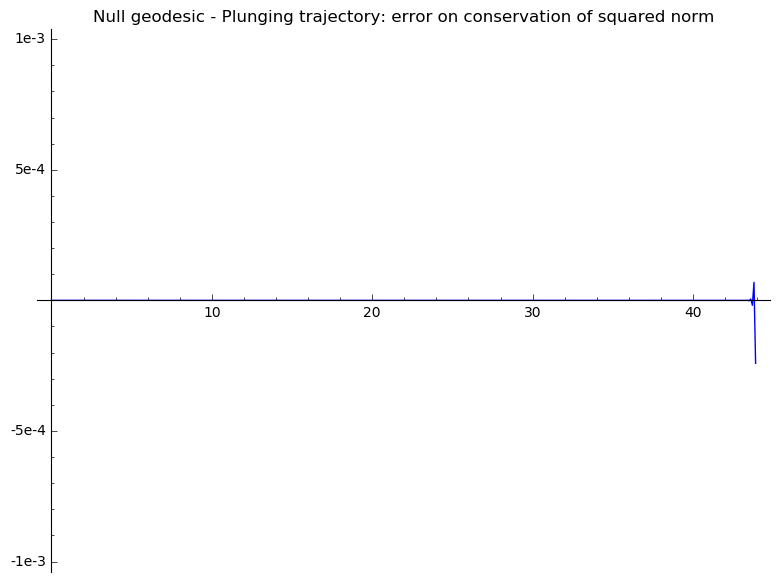

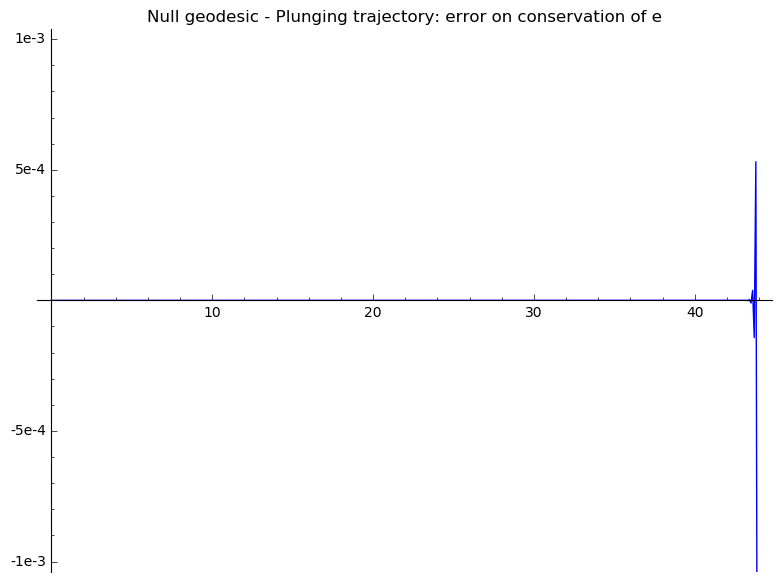

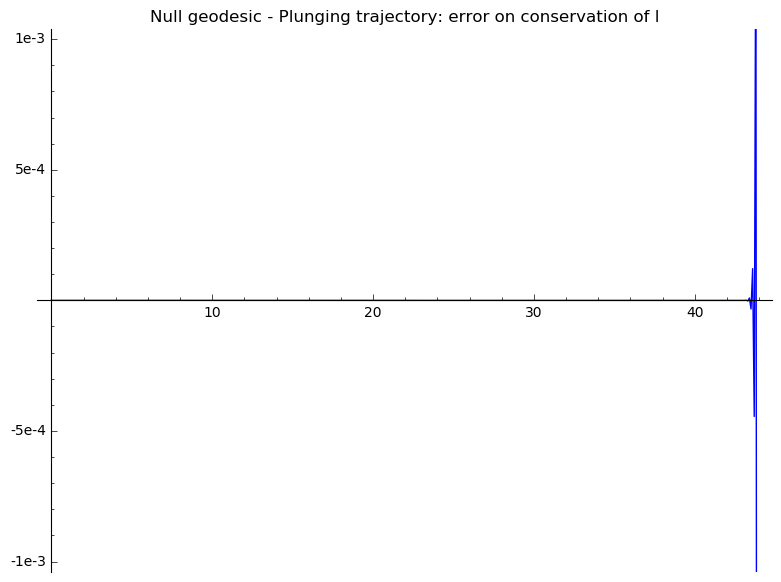

Graphics3d Object

In [41]:
error_squar_norm_null_plunging = []
error_e_null_plunging = []
error_l_null_plunging = []

i = 0
for (S,T,R,TH,PH) in sol_null_plunging:
    P = geod_IEF(S, interpolation_key='null_plunging_equatorial')
    V = geod_IEF.tangent_vector_eval_at(S, interpolation_key='null_plunging_equatorial')
    # print(i)
    squar_norm_null_plunging = numerical_approx((g.at(P)(V,V)).substitute({m:1}))
    e_null_plunging = numerical_approx((-g.at(P)[0,0]*V[0] - V[1]).substitute({m:1}))
    l_null_plunging = numerical_approx((g.at(P)[3,3]*V[3]).substitute({m:1}))
    # print(i)
    if i == 0:
        squar_norm_null_plunging_0 = squar_norm_null_plunging
        e_null_plunging_0 = e_null_plunging
        l_null_plunging_0 = l_null_plunging   

    error_squar_norm_null_plunging += [(S, squar_norm_null_plunging
                                          - squar_norm_null_plunging_0)]
    error_e_null_plunging += [(S, e_null_plunging - e_null_plunging_0)]
    error_l_null_plunging += [(S, l_null_plunging - l_null_plunging_0)]
                                       
    i += 1

plot_error_squar_norm_null_plunging = line(error_squar_norm_null_plunging)
plot_error_e_null_plunging = line(error_e_null_plunging)
plot_error_l_null_plunging = line(error_l_null_plunging)

plot_error_squar_norm_null_plunging.show(title="Null geodesic - Plunging trajectory: error on conservation of " +
                                         "squared norm", ymin=-1e-3, ymax=1e-3)
plot_error_e_null_plunging.show(title="Null geodesic - Plunging trajectory: error on conservation of e",
                                ymin=-1e-3, ymax=1e-3)
plot_error_l_null_plunging.show(title="Null geodesic - Plunging trajectory: error on conservation of l",
                                ymin=-1e-3, ymax=1e-3)

plot3D_projected_geod_IEF_null_plunging = geod_IEF.plot_integrated(interpolation_key='null_plunging_equatorial',
                                                                   mapping=IEF_spatial_coords,
                                                                   plot_points=200,
                                                                   thickness=2,
                                                                   display_tangent=True,
                                                                   plot_points_tangent=10,
                                                                   scale=0.5,
                                                                   width_tangent=1,
                                                                   label_axes=False)

(plot3D_projected_geod_IEF_null_plunging + plot3D_event_horizon + plot3D_origin).show(viewer='threejs',
                                                                                      online=True)